In [ ]:
import numpy as np
import seaborn as sns #связано с pandas
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils, plot_model

In [ ]:
tnt = sns.load_dataset("titanic")
tnt.drop(['class','who','adult_male', 'embark_town', 'alive'], axis='columns', inplace=True)
tnt = tnt.dropna(axis='index', how='any', subset=['embarked']) # удаляем 2 строки с nan в embarked
mean_age = round(tnt['age'].mean())
tnt['age'] = tnt['age'].fillna(mean_age)
tnt['deck'] = tnt['deck'].cat.add_categories('Z')
tnt['deck'] = tnt['deck'].fillna('Z') #вводим новую палубу (Z - zero) вместо NaN
tnt = pd.get_dummies(tnt, columns = ['embarked']) # заменяем три порта отправки тремя колонками
tnt = pd.get_dummies(tnt, columns = ['deck']) # заменяем все палубы колонками
tnt['sex'] = tnt['sex'].replace({'male': 0, 'female': 1})
tnt['fare']=(tnt['fare']-tnt['fare'].mean())/tnt['fare'].std()


In [ ]:
tnt

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Z
0,0,3,0,22.0,1,0,-0.499958,False,0,0,1,0,0,0,0,0,0,0,1
1,1,1,1,38.0,1,0,0.788503,False,1,0,0,0,0,1,0,0,0,0,0
2,1,3,1,26.0,0,0,-0.486376,True,0,0,1,0,0,0,0,0,0,0,1
3,1,1,1,35.0,1,0,0.422623,False,0,0,1,0,0,1,0,0,0,0,0
4,0,3,0,35.0,0,0,-0.483861,True,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,-0.384258,True,0,0,1,0,0,0,0,0,0,0,1
887,1,1,1,19.0,0,0,-0.042189,True,0,0,1,0,1,0,0,0,0,0,0
888,0,3,1,30.0,1,2,-0.173986,False,0,0,1,0,0,0,0,0,0,0,1
889,1,1,0,26.0,0,0,-0.042189,True,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
TRAIN_TEST_RATIO = 0.85 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

train_number = round(tnt.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете
alive = tnt['survived']
params = pd.DataFrame(tnt).drop(['survived'], axis = 1) 

alive_train = np.array(alive).reshape((alive.shape[0], 1))[:train_number] # избегание ошибки с одномерным массивом
params_train = np.array(params).reshape((params.shape[0], tnt.shape[1] -1))[:train_number]

alive_test = np.array(alive).reshape((alive.shape[0], 1))[train_number:]
params_test = np.array(params).reshape((params.shape[0], tnt.shape[1] -1))[train_number:]

params_train = np.asarray(params_train).astype('float32')
params_test = np.asarray(params_test).astype('float32')

#params_train /= 255
#params_test /= 255

In [ ]:
params_train

array([[ 3.  ,  0.  , 22.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  1.  , 38.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  1.  , 26.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 2.  ,  1.  , 48.  , ...,  0.  ,  0.  ,  1.  ],
       [ 2.  ,  0.  ,  0.67, ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  0.  , 28.  , ...,  0.  ,  0.  ,  1.  ]], dtype=float32)

##Model

In [ ]:
tnt.shape

(889, 19)

In [ ]:
model = Sequential()

model.add(Dense(128, input_shape=(tnt.shape[1]-1,), activation='relu', name="hidden_dense_1"))
model.add(Dense(128, kernel_initializer='random_uniform', activation='relu', name="hidden_dense_2"))
model.add(Dropout(0.3))
model.add(Dense(512, kernel_initializer='random_normal', activation='relu', name="hidden_dense_5"))
model.add(Dense(512, activation='relu', name="hidden_dense_6"))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='random_normal', activation='relu', name="output"))

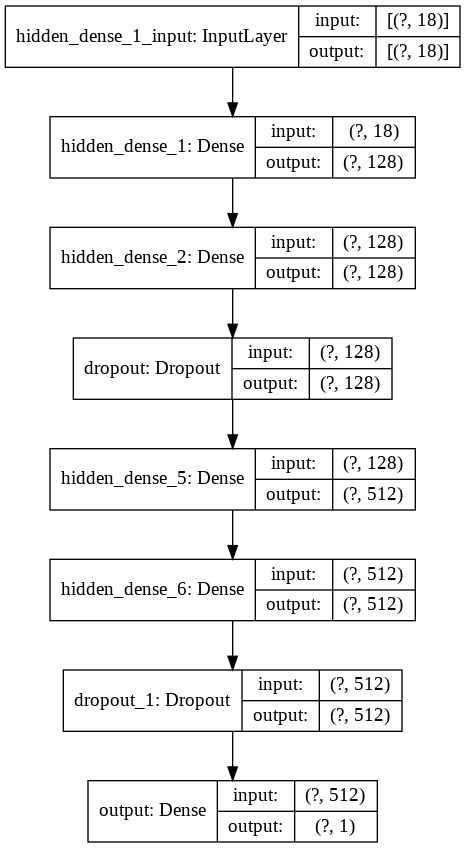

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
alive_train.shape

(756, 1)

In [ ]:
model.fit(params_train, alive_train, epochs=10, batch_size=8, verbose=2, validation_data = ())

Epoch 1/10
95/95 - 0s - loss: 5.8124 - accuracy: 0.5185
Epoch 2/10
95/95 - 0s - loss: 5.8141 - accuracy: 0.5926
Epoch 3/10
95/95 - 0s - loss: 5.8497 - accuracy: 0.6177
Epoch 4/10
95/95 - 0s - loss: 5.9137 - accuracy: 0.6124
Epoch 5/10
95/95 - 0s - loss: 9.1652 - accuracy: 0.3915
Epoch 6/10
95/95 - 0s - loss: 9.3191 - accuracy: 0.3889
Epoch 7/10
95/95 - 0s - loss: 9.3190 - accuracy: 0.3889
Epoch 8/10
95/95 - 0s - loss: 9.2228 - accuracy: 0.3876
Epoch 9/10
95/95 - 0s - loss: 6.8239 - accuracy: 0.5357
Epoch 10/10
95/95 - 0s - loss: 5.9986 - accuracy: 0.6111


In [ ]:
model.evaluate(params_test, alive_test)

5/5 [==============================] - 0s 2ms/step - loss: 5.3349 - accuracy: 0.6541


[5.334944725036621, 0.6541353464126587]